In [2]:
rawnot = pandas.read_csv("animation_run_no_tilt/profileData.txt", header=0)
rawt = pandas.read_csv("animation_run_tilt/profileData.txt", header=0)
raws = pandas.read_csv("BASE,200,1,-2.9999999999999996,03-24-23./profileData.txt",header=0)
print(type(rawnot))
print(type(rawt))

timestep = 200 * 10
tsl = raws.shape[0]/timestep
timelength = rawt.shape[0]/timestep
tl = int(rawnot.shape[0]/timestep)
print((timelength,tl))

# a = np.array(rawt[timestep*100:timestep*200])

# b = np.array(rawnot[timestep*100:timestep*200])

FileNotFoundError: [Errno 2] File animation_run_no_tilt/profileData.txt does not exist: 'animation_run_no_tilt/profileData.txt'

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas




In [4]:
print(rawnot.shape)
print(tl)
print(b.shape[0]/timestep)

NameError: name 'rawnot' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

def init():
    ax.plot()
def animate(i):
    ax.clear()
    potential = generatepotential(0,0,10,40,100,100)
    ax.imshow(potential,"Greys",extent=(-5,5,0,36),aspect=0.2)
    x = a[timestep*(i):timestep*(i+1),0]
    y = a[timestep*(i):timestep*(i+1),1]
    ax.set_xlim(( -5, 5))
    ax.set_ylim((0, 36))
    ax.plot(x,y,'.',color="red")
    return ax

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)

In [5]:
anim.save('animationtilt.gif', writer='imagemagick', dpi=80, fps=10)

NameError: name 'anim' is not defined

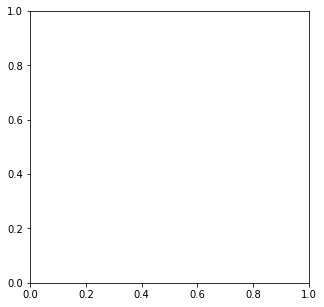

In [6]:
fig, ax = plt.subplots(figsize=(5,5))

def init():
    ax.plot()
def animate(i):
    ax.clear()
    potential = generatepotential(0,0,10,40,100,100)
    ax.imshow(potential,"Greys",extent=(-5,5,0,36),aspect=0.2)
    x = b[timestep*(i):timestep*(i+1),0]
    y = b[timestep*(i):timestep*(i+1),1]
    ax.set_xlim(( -5, 5))
    ax.set_ylim((0, 36))
    ax.plot(x,y,'.',color="red")
    
    return ax

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)

In [ ]:
anim.save('animationnotilt.gif', writer='imagemagick', dpi=80, fps=10)

In [7]:
def generatepotential(x,y,w,h,rx,ry):
    potential = []
    
    for i in range(ry):
        
        potential.append([])
        
        for ii in range(rx):
            conv = w/rx * 2*math.pi
            z = -math.cos(ii * conv + x)
            potential[-1].append(z)
    return potential            
            
    

In [8]:
rundata = pandas.read_csv("400,1,-2.9999999999999996,14-10-56/data.txt", header=None)
rundata = np.array(rundata)

FileNotFoundError: [Errno 2] File 400,1,-2.9999999999999996,14-10-56/data.txt does not exist: '400,1,-2.9999999999999996,14-10-56/data.txt'

In [ ]:
print(rundata)
fig = plt.figure(figsize= (15,10))
output = rundata[4,1:11]
uoutput = rundata[5,1:11]
theta = np.array([range(10)])*2/200
plt.plot(theta[0],output)

In [ ]:
raws = pandas.read_csv("200,1,-2.9999999999999996,15-18-55/profileData.txt",header=0)
timestep = 200 * 10
tsl = raws.shape[0]/timestep
print(tsl)
b = np.array(raws)
plt.plot(b[100:200, 0], b[100:200, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

def init():
    ax.plot()
def animate(i):
    ax.clear()
    potential = generatepotential(0,0,10,40,100,100)
    ax.imshow(potential,"Greys",extent=(-5,5,0,36),aspect=0.2)
    x = b[timestep*(i):timestep*(i+1),0]
    y = b[timestep*(i):timestep*(i+1),1] +50
    ax.set_xlim(( -5, 5))
    ax.set_ylim((0, 36))
    ax.plot(x,y,'.',color="red")
    
    return ax

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)
anim.save('animp.gif', writer='imagemagick', dpi=80, fps=10)

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.hist2d(b[:,0],b[:,1],bins=[100,100])


In [10]:
raws = pandas.read_csv("BASE,200,1,-2.9999999999999996,12-49-57/data.txt",header=0)
print(raws)

        dx  -0.278515   0.387869   0.493072  0.0565953   0.923705     0.6416  \
0      udx        NaN        NaN        NaN   0.000116        NaN        NaN   
1   length  10.750400  10.713100  10.721500  10.693000  10.603000  10.661800   
2  ulength   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3   output  -0.025907   0.036205   0.045989   0.005293   0.087117   0.060177   
4  uoutput        NaN        NaN        NaN   0.000116        NaN        NaN   
5      dx2   0.019790   0.019803   0.019897   0.020140   0.020360   0.019956   

    0.928458    1.29962    1.31663    1.19695  
0        NaN   0.000141   0.000104        NaN  
1  10.693300  10.708600  10.704500  10.714500  
2   0.000000   0.000000   0.000000   0.000000  
3   0.086826   0.121362   0.122998   0.111713  
4        NaN   0.000141   0.000104        NaN  
5   0.019835   0.020042   0.019658   0.019946  
